In [19]:
import pandas as pd
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://6ia-bucket.s3.amazonaws.com/dados.csv', sep=',', index_col=False)

In [20]:
df.head(5)

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [21]:
Y = df[['Stock_Index_Price']]

x = df[['Interest_Rate', 'Unemployment_Rate']]

model = LinearRegression(n_jobs=-1).fit(x, Y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

new_interest_rate = 1.2
new_unemployment_rate = 7.5

df.to_csv('dados.csv', index=False)

print('Predicao: \n', model.predict([[new_interest_rate, new_unemployment_rate]]))

Intercept: 
 [1798.40397763]
Coefficients: 
 [[ 345.54008701 -250.14657137]]
Predicao: 
 [[336.95279677]]


# Kmeans

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_kmeans = pd.read_csv('https://6ia-bucket.s3.amazonaws.com/datakmeans.txt', sep='\t', index_col=False)

In [28]:
df_kmeans.head(5)

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [55]:
model = KMeans(n_clusters=4).fit(df_kmeans)

In [37]:
print(model.cluster_centers_)

[[29.6 66.8]
 [43.2 16.7]
 [55.1 46.1]]


In [57]:
centroids = model.cluster_centers_

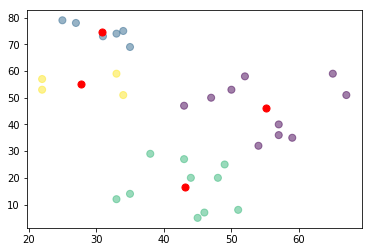

In [58]:
plt.scatter(df_kmeans['x'], df_kmeans['y'], c=model.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

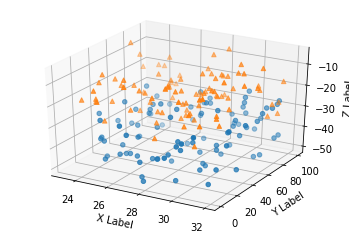

In [54]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Usando AWS Aurora

In [63]:
import pymysql

host = 'aula-6ia.cluster-ro-c4ubfian0o4c.us-east-1.rds.amazonaws.com'
user = 'admin'
pwd = 'admin123456'
db = 'aula-6ia'


conn = pymysql.connect(host, 
                       user=user,
                       port=3306,
                       passwd=pwd, 
                       db=db)

OperationalError: (2003, "Can't connect to MySQL server on 'aula-6ia.cluster-ro-c4ubfian0o4c.us-east-1.rds.amazonaws.com' (timed out)")